In [30]:
from selenium import webdriver

def start_driver(url = "https://toto.nederlandseloterij.nl/nl/wedden/voetbal/eredivisie-nederland"):
    driver = webdriver.Chrome(executable_path=r'C:/Webdrivers/chromedriver.exe')
    driver.get(url)
    return driver
    
    
# page = driver.page_source

In [6]:
content = driver.find_element_by_class_name("oddValue")

In [201]:
import pandas as pd
from selenium import webdriver
import time

def start_driver(url = "https://toto.nederlandseloterij.nl/nl/wedden/voetbal/eredivisie-nederland"):
    driver = webdriver.Chrome(executable_path=r'C:/Webdrivers/chromedriver.exe')
    driver.get(url)
    return driver

def get_content(driver,css_header):    
    games = driver.find_elements_by_css_selector(css_header)
    return games

def unfold_unibet(driver,
                  css_count = 'span.KambiBC-mod-event-group-header__event-count',
                  css_header = 'div.KambiBC-collapsible-header__title-wrapper'):
    while True:
        try:
            while (len(driver.find_elements_by_css_selector(css_count)) > 0):
                try:
                    driver.find_elements_by_css_selector(css_count)[0].click()
                    driver.implicitly_wait(1)
                except:
                    break
            driver.implicitly_wait(1)
            for i in range(0,len(driver.find_elements_by_css_selector(css_count))):
                driver.find_elements_by_css_selector(css_header)[-i].click()
            break
        except:
            time.sleep(1)

def make_dataframe_toto(games):
    time = []
    home = []
    out = []

    odd1 = []
    odd2 = []
    odd3 = []

    for item in games:
        temp_list = item.text.split("\n")
        try:
            time.append(temp_list[0])
            home.append(temp_list[1])
            out.append(temp_list[3])
            odd1.append(temp_list[4])
            odd2.append(temp_list[5])
            odd3.append(temp_list[6])
        except:
            print(f"error: {temp_list}")

    d    = {"Time":time,"home":home,"out":out,"Odd one":odd1, "Odd two":odd2, "Odd three":odd3}
    return pd.DataFrame(data=d)

def make_dataframe_unibet(games):
    time = []
    home = []
    out = []

    odd1 = []
    odd2 = []
    odd3 = []

    for item in games:
        temp_list = item.text.split("\n")
        try:
            time.append(temp_list[1])
            home.append(temp_list[2])
            out.append(temp_list[3])
            odd1.append(temp_list[-5])
            odd2.append(temp_list[-3])
            odd3.append(temp_list[-1])
        except:
            print(f"error: {temp_list}")
    
    d    = {"Time":time,"home":home,"out":out,"Odd one":odd1, "Odd two":odd2, "Odd three":odd3}
    return pd.DataFrame(data=d)

def make_dataframe_betson(games):
    time = []
    home = []
    out = []

    odd1 = []
    odd2 = []
    odd3 = []

    for item in games:
        temp_list = item.text.split("\n")
        try:
            time.append(temp_list[1])
            teams = temp_list[2].split(' - ')
            home.append(teams[0])
            out.append(teams[1])
            score = temp_list[3].split(' ')
            odd1.append(score[0])
            odd2.append(score[1])
            odd3.append(score[2])
        except:
            print(f"error: {temp_list}")
    
    d    = {"Time":time,"home":home,"out":out,"Odd one":odd1, "Odd two":odd2, "Odd three":odd3}
    return pd.DataFrame(data=d)

def make_dataframe_bwin(games):
    time = []
    home = []
    out = []

    odd1 = []
    odd2 = []
    odd3 = []

    for item in games:
        temp_list = item.text.split("\n")
        try:
            time.append(twe_to_24(temp_list[0]))
            home.append(temp_list[2])
            out.append(temp_list[6])
            odd1.append(temp_list[3])
            odd2.append(temp_list[5])
            odd3.append(temp_list[7])
        except:
            print(f"error: {temp_list}")
    
    d    = {"Time":time,"home":home,"out":out,"Odd one":odd1, "Odd two":odd2, "Odd three":odd3}
    return pd.DataFrame(data=d)

def make_dataframe_888(games):
    time = []
    home = []
    out = []

    odd1 = []
    odd2 = []
    odd3 = []

    for item in games:
        temp_list = item.text.split("\n")
        try:
            time.append(temp_list[1])
            home.append(temp_list[2])
            out.append(temp_list[3])
            odd1.append(temp_list[-5])
            odd2.append(temp_list[-3])
            odd3.append(temp_list[-1])
        except:
            print(f"error: {temp_list}")
    
    d    = {"Time":time,"home":home,"out":out,"Odd one":odd1, "Odd two":odd2, "Odd three":odd3}
    return pd.DataFrame(data=d)

'Fri\n20:00\nVVV Venlo\nHeracles Almelo\nLive\n+144\nVVV Venlo\n2.63\nDraw\n3.50\nHeracles Almelo\n2.50'

def twe_to_24(twelve_str):
    try:
        int(twelve_str[2])
        new_time =  str(int(twelve_str[0])+12)+':'+twelve_str[2:4]
    except:
        new_time =  str(((int(twelve_str[0:2]))%12)+12)+':'+twelve_str[3:5]

    return new_time

In [415]:
driver = start_driver()

In [416]:
# driver = start_driver()
games = get_content(driver,'div.common.eventRow')
df1 = make_dataframe_toto(games)

In [417]:
df1

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV-Venlo,Heracles Almelo,"2,60","3,45","2,47"
1,18:30,FC Utrecht,Excelsior,"1,31","5,30","7,90"
2,19:45,Fortuna Sittard,SC Heerenveen,"2,75","3,65","2,27"
3,19:45,PEC Zwolle,De Graafschap,"1,51","4,25","5,55"
4,20:45,NAC Breda,FC Groningen,"3,40","3,40","2,03"
5,12:15,ADO Den Haag,Ajax,"11,75","7,00","1,17"
6,14:30,FC Emmen,Vitesse,"4,00","3,65","1,79"
7,14:30,PSV,Feyenoord,"1,50","4,55","5,15"
8,16:45,Willem II,AZ,"5,00","4,15","1,56"
9,20:00,De Graafschap,ADO Den Haag,"2,70","3,40","2,40"


In [138]:
driver = start_driver("https://www.unibet.eu/betting#filter/football/netherlands/eredivisie")
unfold_unibet(driver)
games = get_content(driver,'div.KambiBC-event-item__event-wrapper')
df2 = make_dataframe_unibet(games)
df2

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV Venlo,Heracles Almelo,2.70,3.60,2.60
1,18:30,FC Utrecht,Excelsior Rotterdam,1.32,5.60,10.00
2,19:45,Fortuna Sittard,SC Heerenveen,2.85,3.90,2.35
3,19:45,PEC Zwolle,De Graafschap,1.47,4.50,7.50
4,20:45,NAC Breda,FC Groningen,3.60,3.45,2.15
5,12:15,ADO Den Haag,Ajax,15.00,7.75,1.19
6,14:30,FC Emmen,Vitesse,4.30,3.80,1.85
7,14:30,PSV Eindhoven,Feyenoord,1.53,4.80,5.75
8,16:45,Willem II,AZ Alkmaar,5.35,4.25,1.63
9,20:00,De Graafschap,ADO Den Haag,2.75,3.50,2.45


In [406]:
url = 'https://sportsbook.betsson.com/en/football/netherlands/dutch-eredivisie'
css_head = 'tr.event-row'
# driver = start_driver(url)
games = get_content(driver,css_head)
df3 = make_dataframe_betson(games)

In [407]:
df3 = make_dataframe_betson(games)

In [408]:
df3

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV Venlo,Heracles Almelo,2.65,3.55,2.50
1,18:30,FC Utrecht,Excelsior,1.32,5.50,8.65
2,19:45,PEC Zwolle,De Graafschap,1.53,4.30,5.90
3,19:45,Fortuna Sittard,SC Heerenveen,2.75,3.75,2.34
4,20:45,NAC Breda,FC Groningen,3.45,3.50,2.09
5,12:15,ADO Den Haag,Ajax,15.50,7.25,1.17
6,14:30,PSV Eindhoven,Feyenoord,1.52,4.60,5.60
7,14:30,FC Emmen,Vitesse,4.10,3.75,1.82
8,16:45,Willem II,AZ,5.50,4.15,1.58


In [403]:
url = "https://sports.bwin.com/en/sports?wm=3584843&zoneId=1722387#eventId=&leagueIds=6361&marketGroupId=&page=0&sportId=4"
css_head = 'div.marketboard-event-without-header'
driver = start_driver(url)
games = get_content(driver,css_head)
df4 = make_dataframe_bwin(games)

In [404]:
make_dataframe_bwin(games)

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV Venlo,Heracles,2.50,3.50,2.60
1,18:30,FC Utrecht,SBV Excelsior,1.30,5.75,8.00
2,19:45,PEC Zwolle,De Graafschap,1.48,4.25,6.25
3,19:45,Fortuna Sittard,SC Heerenveen,2.80,3.60,2.30
4,20:45,NAC Breda,Groningen,3.20,3.60,2.10
5,12:15,ADO Den Haag,Ajax Amsterdam,13.00,7.75,1.16
6,14:30,PSV Eindhoven,Feyenoord Rotterdam,1.57,4.33,5.00
7,14:30,FC Emmen,Vitesse Arnhem,4.00,3.80,1.80
8,16:45,Willem II,AZ Alkmaar,5.25,4.10,1.57


In [187]:
url = "https://www.888sport.com/#/filter/football"
css_event = "div.KambiBC-event-item__event-wrapper"
driver = start_driver(url)



In [192]:
ned = "span.KambiBC-mod-event-group-header__main-title"
games = driver.find_elements_by_css_selector(ned)

In [194]:
found = False
games[1].click()
while True:
    try:
        for i in range(0,len(games)):
            print(games[i].text)
            if "Netherlands" in games[i].text:
                print(games[i].text)
                print(i)
                games[i].click()
        break
    except:
        time.sleep(1)

Right Now 
Champions League 
Spain 
Italy 
Germany 
France 
Europa League 
AFC Champions League 
Argentina 
Australia 
Austria 
Belgium 
Brazil 
Bulgaria 
Club Friendly Matches 
Colombia 
Copa Libertadores 
Copa Sudamericana 
Croatia 
Czech Republic 
Denmark 
Ecuador 
Egypt 
England 
Finland 
France 
Germany 
Indonesia 
Iran 
Ireland 
Italy 
Jamaica 
Jordan 
Mexico 
Montenegro 
Netherlands 
Netherlands 
35
Panama 
Paraguay 
Peru 
Poland 
Portugal 
Romania 
Russia 
Saudi Arabia 
Scotland 
South Africa 
Spain 
Sweden 
Switzerland 
Ukraine 


In [195]:
css_event = "div.KambiBC-event-item__event-wrapper"
games = get_content(driver,css_event)

In [198]:
games[0].text

'Fri\n20:00\nVVV Venlo\nHeracles Almelo\nLive\n+144\nVVV Venlo\n2.63\nDraw\n3.50\nHeracles Almelo\n2.50'

In [202]:
df5 = make_dataframe_888(games)

In [203]:
df5

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV Venlo,Heracles Almelo,2.63,3.50,2.50
1,18:30,FC Utrecht,Excelsior Rotterdam,1.30,5.40,9.50
2,19:45,Fortuna Sittard,SC Heerenveen,2.75,3.75,2.28
3,19:45,PEC Zwolle,De Graafschap,1.44,4.35,7.00
4,20:45,NAC Breda,FC Groningen,3.50,3.35,2.10
5,12:15,ADO Den Haag,Ajax,14.00,7.50,1.17
6,14:30,FC Emmen,Vitesse,4.20,3.70,1.81
7,14:30,PSV Eindhoven,Feyenoord,1.50,4.60,5.50
8,16:45,Willem II,AZ Alkmaar,5.20,4.10,1.60


In [100]:
toto_home = list(df1['home'])
uni_home = list(df2["home"])

In [103]:
for team in uni_home:
    if team in toto_home:
        print(team)


FC Utrecht
Fortuna Sittard
PEC Zwolle
NAC Breda


In [204]:
l  = [1.53,4.50,7.00]



In [206]:
sum(l)/3

4.343333333333334

In [213]:
3/1.53+3/4.50+3/7

3.0560224089635852

In [214]:
Clubs = ["PSV", "AJAX", "Feyenoord", "AZ", "Vitesse", "Utrecht", "Heracles",
         "VVV", "Groningen", "ADO", "Fortuna", "Willem", "Pec", "Excelsior",
         "Heerenveen", "Emmen", "De Graafschap", "NAC"]

In [409]:
fil = False
out = [""]*len(Clubs)
oddsw = [0.0]*len(Clubs)
site1 = [""]*len(Clubs)
oddse = [0.0]*len(Clubs)
site2 = [""]*len(Clubs)
oddsl = [0.0]*len(Clubs)
site3 = [""]*len(Clubs)

for site,dataframe in enumerate([df1,df2,df3,df4,df5],1):
    home = list(dataframe["home"])
    for i,club in enumerate(Clubs):
        for j,team in enumerate(home):    
            if club in team:
                if not fil or not dataframe["out"][j][0:2] == out[i][0:2]:
                    out[i] = dataframe["out"][j]
                    fil  = True
                if oddsw[i] < float(dataframe["Odd one"][j].replace(',',".")):
                    oddsw[i] = float(dataframe["Odd one"][j].replace(',',"."))
                    site1[i] = site
                if oddse[i] < float(dataframe["Odd two"][j].replace(',',".")):
                    oddse[i] = float(dataframe["Odd two"][j].replace(',',"."))
                    site2[i] = site
                if oddsl[i] < float(dataframe["Odd three"][j].replace(',',".")):
                    oddsl[i] = float(dataframe["Odd three"][j].replace(',',"."))
                    site3[i] = site
Custum_d = {"HOME":Clubs, "OUT":out, "Win":oddsw, "source1":site1,"equal":oddse,"source2":site2, "Lose":oddsl, "source3":site3}

In [221]:
home_1

['VVV-Venlo',
 'FC Utrecht',
 'PEC Zwolle',
 'Fortuna Sittard',
 'NAC Breda',
 'ADO Den Haag',
 'FC Emmen',
 'PSV',
 'Willem II']

In [227]:
 [""]*len(Clubs)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [410]:
import pandas as pd
df_cool = pd.DataFrame(data=Custum_d)

In [287]:
one = df_cool["Win"]
two = df_cool["equal"]
three = df_cool["Lose"]

sone = df_cool["source1"]
stwo = df_cool["source2"]
sthree = df_cool["source3"]



for i in range(0,len(df_cool)):
    if one[i] != 0.0:
        tot = 3/one[i]+3/two[i]+3/three[i]
        print(f"Total: {round(tot,3)}\n                  bet:{3/one[i]} on {sone[i]} and bet:{3/two[i]} on {stwo[i]} and bet:{3/three[i]} on {sthree[i]}" )

Total: 3.058
                  bet:1.910828025477707 on 3 and bet:0.625 on 2 and bet:0.5217391304347826 on 2
Total: 3.175
                  bet:2.5 on 2 and bet:0.4444444444444444 on 2 and bet:0.23076923076923078 on 2
Total: 3.173
                  bet:2.4 on 2 and bet:0.5 on 2 and bet:0.2727272727272727 on 2
Total: 3.186
                  bet:2.222222222222222 on 2 and bet:0.6 on 2 and bet:0.36363636363636365 on 2
Total: 3.094
                  bet:2.2727272727272725 on 2 and bet:0.5217391304347826 on 3 and bet:0.3 on 2
Total: 3.19
                  bet:1.0526315789473684 on 2 and bet:0.8333333333333333 on 2 and bet:1.3043478260869565 on 2
Total: 3.098
                  bet:1.111111111111111 on 2 and bet:0.8333333333333333 on 2 and bet:1.1538461538461537 on 2
Total: 3.172
                  bet:1.5384615384615385 on 2 and bet:0.8 on 2 and bet:0.8333333333333333 on 2
Total: 3.108
                  bet:0.2 on 2 and bet:0.3870967741935484 on 2 and bet:2.5210084033613445 on 2
Total: 3.046


In [286]:
df_cool

,HOME,OUT,Win,source1,equal,source2,Lose,source3
0,PSV,Feyenoord,1.57,3,4.80,2,5.75,2
1,AJAX,,0.00,,0.00,,0.00,
2,Feyenoord,FC Emmen,1.20,2,6.75,2,13.00,2
3,AZ,Fortuna Sittard,1.25,2,6.00,2,11.00,2
4,Vitesse,NAC Breda,1.35,2,5.00,2,8.25,2
5,Utrecht,Excelsior Rotterdam,1.32,2,5.75,3,10.00,2
6,Heracles,FC Utrecht,2.85,2,3.60,2,2.30,2
7,VVV,Heracles Almelo,2.70,2,3.60,2,2.60,2
8,Groningen,VVV Venlo,1.95,2,3.75,2,3.60,2
9,ADO,Ajax,15.00,2,7.75,2,1.19,2


In [246]:
3.0575671559124897
inf
3.1752136752136755
3.172727272727273
3.1858585858585857
3.094466403162055
3.190312738367658
3.098290598290598
3.171794871794872
3.1081051775548927
3.046352144096505
3.107120814038591
inf
3.1752136752136755
3.171794871794872
3.108769724436799
3.1725417439703154
3.062015503875969

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV-Venlo,Heracles Almelo,"2,60","3,45","2,47"
1,18:30,FC Utrecht,Excelsior,"1,31","5,30","7,90"
2,19:45,PEC Zwolle,De Graafschap,"1,51","4,25","5,55"
3,19:45,Fortuna Sittard,SC Heerenveen,"2,70","3,65","2,31"
4,20:45,NAC Breda,FC Groningen,"3,40","3,40","2,03"
5,12:15,ADO Den Haag,Ajax,"11,75","7,00","1,17"
6,14:30,FC Emmen,Vitesse,"4,00","3,65","1,79"
7,14:30,PSV,Feyenoord,"1,52","4,50","5,05"
8,16:45,Willem II,AZ,"4,90","4,05","1,59"


In [277]:
df1

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV-Venlo,Heracles Almelo,"2,60","3,45","2,47"
1,18:30,FC Utrecht,Excelsior,"1,31","5,30","7,90"
2,19:45,PEC Zwolle,De Graafschap,"1,51","4,25","5,55"
3,19:45,Fortuna Sittard,SC Heerenveen,"2,70","3,65","2,31"
4,20:45,NAC Breda,FC Groningen,"3,40","3,40","2,03"
5,12:15,ADO Den Haag,Ajax,"11,75","7,00","1,17"
6,14:30,FC Emmen,Vitesse,"4,00","3,65","1,79"
7,14:30,PSV,Feyenoord,"1,52","4,50","5,05"
8,16:45,Willem II,AZ,"4,90","4,05","1,59"


In [412]:
df_cool

,HOME,OUT,Win,source1,equal,source2,Lose,source3
0,PSV,Feyenoord,1.57,4,4.80,2,5.75,2
1,AJAX,,0.00,,0.00,,0.00,
2,Feyenoord,FC Emmen,1.20,2,6.75,2,13.00,2
3,AZ,Fortuna Sittard,1.25,2,6.00,2,11.00,2
4,Vitesse,NAC Breda,1.35,2,5.00,2,8.25,2
5,Utrecht,Excelsior Rotterdam,1.32,2,5.75,4,10.00,2
6,Heracles,FC Utrecht,2.85,2,3.60,2,2.30,2
7,VVV,Heracles Almelo,2.70,2,3.60,2,2.60,2
8,Groningen,VVV Venlo,1.95,2,3.75,2,3.60,2
9,ADO,Ajax,15.50,3,7.75,2,1.19,2


In [414]:
import numpy as np
o1 = 1.77
o2 = 4.80
o3 = 5.75

def profitable(o1,o2,o3):
    O = o1+o2+o3
    I = O/o1+O/o2+O/o3
    winst = O-I
    return winst

profitable(o1,o2,o3)

0.6502726602800308

In [411]:
one = df_cool["Win"]
two = df_cool["equal"]
three = df_cool["Lose"]

sone = df_cool["source1"]
stwo = df_cool["source2"]
sthree = df_cool["source3"]



for i in range(0,len(df_cool)):
    if one[i] != 0.0:
        print(profitable(one[i],two[i],three[i]))

-0.23257130988645613
-1.2235754985754994
-1.0507575757575758
-0.9045117845117829
-0.5375138339920937
-0.5550788202390038
-0.29159544159544204
-0.5325641025641037
-0.828137706695582
-0.29865621500559847
-0.34833305993897845
-1.2235754985754959
-0.5325641025641037
-0.3607529193820511
-0.5003710575139149
-0.19328165374676942


Text(0,0.5,'Profit with (3:3:x)')

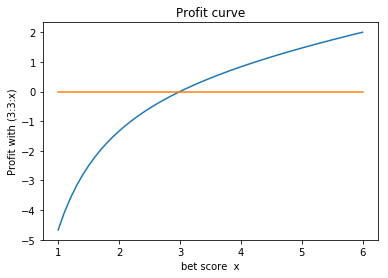

In [379]:
import matplotlib.pyplot as plt
line = []

line2 = np.linspace(1,6,51)

for n in line2:
    line.append(profitable(3,3,n))

plt.plot(line2,line)
plt.plot(line2,[0]*len(line2))
plt.title("Profit curve")
plt.xlabel("bet score  x")
plt.ylabel("Profit with (3:3:x)")

In [372]:
%matplotlib inline

In [383]:
import numpy as np
o1 = 9.50
o2 = 1.08

def profitable(o1,o2):
    O = o1+o2
    I = O/o1+O/o2
    winst = O-I
    return winst

profitable(o1,o2)

-0.3299805068226114

Text(0,0.5,'Profit with (3:3:x)')

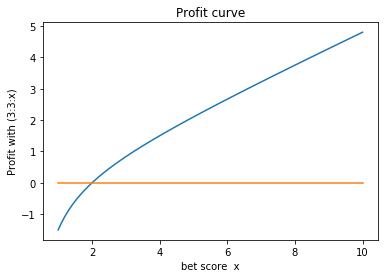

In [385]:
import matplotlib.pyplot as plt
line = []

line2 = np.linspace(1,10,91)

for n in line2:
    line.append(profitable(2,n))

plt.plot(line2,line)
plt.plot(line2,[0]*len(line2))
plt.title("Profit curve")
plt.xlabel("bet score  x")
plt.ylabel("Profit with (3:3:x)")

In [390]:
df4

,Time,home,out,Odd one,Odd two,Odd three
0,8:00 PM,VVV Venlo,X,2.50,3.50,2.60
1,6:30 PM,FC Utrecht,X,1.30,5.75,8.00
2,7:45 PM,Fortuna Sittard,X,2.65,3.50,2.45
3,7:45 PM,PEC Zwolle,X,1.48,4.25,6.25
4,8:45 PM,NAC Breda,X,3.20,3.60,2.10
5,12:15 PM,ADO Den Haag,X,13.00,7.75,1.16
6,2:30 PM,FC Emmen,X,4.00,3.80,1.80
7,2:30 PM,PSV Eindhoven,X,1.57,4.33,5.00
8,4:45 PM,Willem II,X,5.25,4.10,1.57


In [392]:
df3

,Time,home,out,Odd one,Odd two,Odd three
0,8:00 PM,VVV Venlo,X,2.50,3.50,2.60
1,6:30 PM,FC Utrecht,X,1.30,5.75,8.00
2,7:45 PM,Fortuna Sittard,X,2.65,3.50,2.45
3,7:45 PM,PEC Zwolle,X,1.48,4.25,6.25
4,8:45 PM,NAC Breda,X,3.20,3.60,2.10
5,12:15 PM,ADO Den Haag,X,13.00,7.75,1.16
6,2:30 PM,FC Emmen,X,4.00,3.80,1.80
7,2:30 PM,PSV Eindhoven,X,1.57,4.33,5.00
8,4:45 PM,Willem II,X,5.25,4.10,1.57


In [394]:
df2

,Time,home,out,Odd one,Odd two,Odd three
0,20:00,VVV Venlo,Heracles Almelo,2.70,3.60,2.60
1,18:30,FC Utrecht,Excelsior Rotterdam,1.32,5.60,10.00
2,19:45,Fortuna Sittard,SC Heerenveen,2.85,3.90,2.35
3,19:45,PEC Zwolle,De Graafschap,1.47,4.50,7.50
4,20:45,NAC Breda,FC Groningen,3.60,3.45,2.15
5,12:15,ADO Den Haag,Ajax,15.00,7.75,1.19
6,14:30,FC Emmen,Vitesse,4.30,3.80,1.85
7,14:30,PSV Eindhoven,Feyenoord,1.53,4.80,5.75
8,16:45,Willem II,AZ Alkmaar,5.35,4.25,1.63
9,20:00,De Graafschap,ADO Den Haag,2.75,3.50,2.45
